In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
classes_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
x_train.max()

255

In [7]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [8]:
x_train = x_train / 255
x_test = x_test / 255

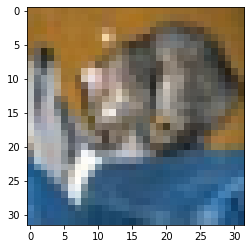

In [9]:
plt.imshow(x_test[0])

In [10]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
hist=model.fit(x_train,y_train,batch_size=500,epochs=10,verbose=1,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 36s 806us/sample - loss: 1.7362 - accuracy: 0.3806 - val_loss: 1.4275 - val_accuracy: 0.4894
Epoch 2/10
45000/45000 [==============================] - 42s 934us/sample - loss: 1.3534 - accuracy: 0.5228 - val_loss: 1.2568 - val_accuracy: 0.5662
Epoch 3/10
45000/45000 [==============================] - 42s 929us/sample - loss: 1.2145 - accuracy: 0.5735 - val_loss: 1.1407 - val_accuracy: 0.6020
Epoch 4/10
45000/45000 [==============================] - 42s 929us/sample - loss: 1.1204 - accuracy: 0.6082 - val_loss: 1.0911 - val_accuracy: 0.6240
Epoch 5/10
45000/45000 [==============================] - 41s 920us/sample - loss: 1.0552 - accuracy: 0.6307 - val_loss: 1.0295 - val_accuracy: 0.6494
Epoch 6/10
45000/45000 [==============================] - 42s 937us/sample - loss: 0.9981 - accuracy: 0.6525 - val_loss: 0.9900 - val_accuracy: 0.6564
Epoch 7/10
45000/45000 [=====================

In [14]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9167672737121582, 0.6795]

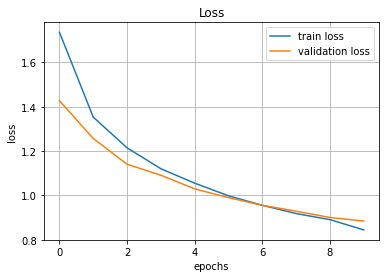

In [15]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

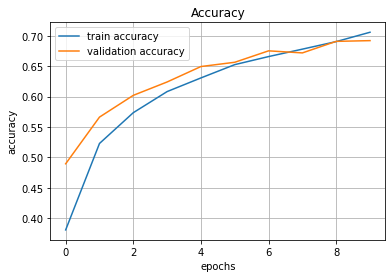

In [16]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [17]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [18]:
y_pred=model.predict_classes(x_test)

In [19]:
y_pred

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [20]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [21]:
mat=confusion_matrix(y_test,y_pred)

In [22]:
mat

array([[746,  24,  56,  25,   9,   9,  14,   6,  69,  42],
       [ 21, 786,  10,  22,   1,   7,   9,   2,  25, 117],
       [ 71,   5, 559,  82,  71,  91,  71,  29,   8,  13],
       [ 20,   8,  81, 531,  38, 202,  71,  25,  15,   9],
       [ 28,   4, 117,  98, 539,  54,  76,  70,  13,   1],
       [ 16,   4,  80, 174,  35, 619,  22,  38,   6,   6],
       [  5,   4,  69,  78,  23,  33, 780,   3,   3,   2],
       [ 15,   2,  48,  58,  57,  79,   8, 718,   1,  14],
       [ 84,  53,  11,  17,   2,  14,   4,   6, 776,  33],
       [ 41, 112,  12,  22,   5,  12,  10,  18,  27, 741]], dtype=int64)

(<Figure size 648x648 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

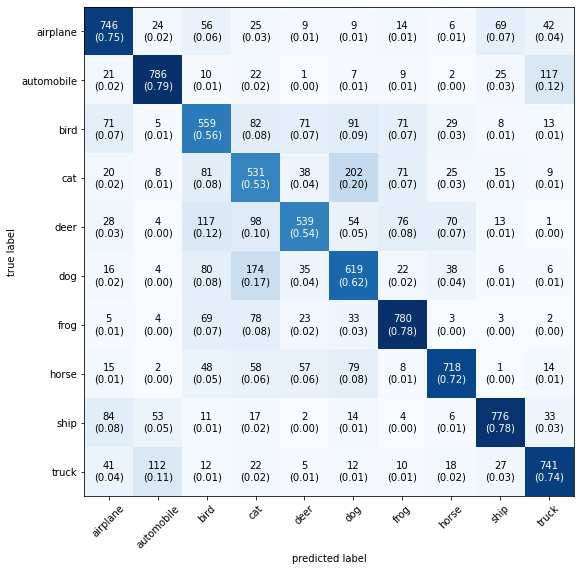

In [23]:
plot_confusion_matrix(mat,figsize=(9,9),class_names=classes_name,show_normed=True)